# Random Walks and Diffusion
## Introduction:
A random walk is a mathematical model that is used to simulate random motion. There are many formulations of random walks, but the simplest in two-dimensions is as follows. Consider a node at initial position $(x_{0},y_{0})\in\mathbb{R}^2$ at time $t=t_0$ [a.u.]. This node can move in two orthogonal directions: vertically along in the $y$-direction, and horizontally in the $x$-direction. At the next time point $t_1$ our node will randomly move $1$ unit to the right or left and randomly up or down. Mathematically, this is given as
\begin{align}
x_{1}&=x_0\pm1 &\quad y_{1}&=y_{0}\pm1,
\end{align}
where again, the choice between adding or subtracting $1$ is random. In general, the $k_{k+1}$-th position $(x_{k+1},y_{k+1})$ is given by
\begin{align}
x_{k+1}&=x_k\pm1 &\quad y_{k+1}&=y_{k}\pm1.
\end{align}
The choice between each movement is exactly captured by a Bernoulli trial, a probabilistic experiment that has two outcomes, like a coin toss with probability $p$ of getting heads. If $X$ is the discrete random variable corresponding to the outcome of each step (either $+1$ or $-1$), then the expected value is
\begin{align}
\mu_{X}=\langle X\rangle&=\sum_{i=0}^{1}(2i-1)\cdot B(2i-1)\\
&=-1\cdot(1-p)+1(p)\\
&=2p-1
\end{align}
For a "fair" Bernoulli trial, $p=0.5$, the expected value is simply zero. The variance is thus
\begin{align}
\sigma_{X}^2=\langle(X-\mu_{X})^2\rangle\\
&=\langle X^2\rangle \mu_{X}^2\\
&=\sum_{i=0}^{1}(2i-1)^2B(2i-1) -\mu_{X}^2\\
&=(-1)^2(1-p)+(1)^2(p)-(2p-1)^2\\
&=1-p+p-4p^2+4p-1\\
&=4p-4p^2.
\end{align}
For a fair Bernoulli trial, the variance is $1$.

The stochasticity of the model is interesting in its own right, for instance, investigating how trajectories change with respect to different probabilities of success, but a random walk is a very powerful model of real-world phenomena. One such phenomenon is *Brownian motion*, which relates to the motion of small particles suspended in a fluid, usually at a micron-scale. This Brownian motion is a random motion, where a single particle's position fluctuates due to collisions and interactions with other particles. As part of this project, we will investigate Brownian Motion data of a colloidal particle of radius $0.37\text{nm}$

## Setup and Simulating Brownian Motion
To achieve our modeling of Brownian motion, we need a systematic way of simulating Bernoulli trials. To achieve this, we will be using random number generators. Python's `numpy` module features an extensive catalog of random number generators and methods, all of which using different probability distributions. We will be using the `default_rng` constructor, which can generate arrays of random numbers in the range $[0,1)$. We will specify the number $n$ of steps we want, but this can also be thought of as how many coin flips we will do. We construct the function `get_trajectory` that takes `N` steps and probability of success `p` and returns a random walk trajectory.

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
from scipy.special import factorial

# random object initialization
rng = np.random.default_rng()
rand = rng.random

# steps and coin flip probability
n_steps = 100
p = 0.5

# function to generate trajectory array of length N for probability p
def get_trajectory(N, p):
    samp = rand(N)
    disp = 2*(samp < p) -1
    traj = np.cumsum(disp)
    return traj

In [193]:
x_traj = get_trajectory(n_steps, p)
y_traj = get_trajectory(n_steps, p)

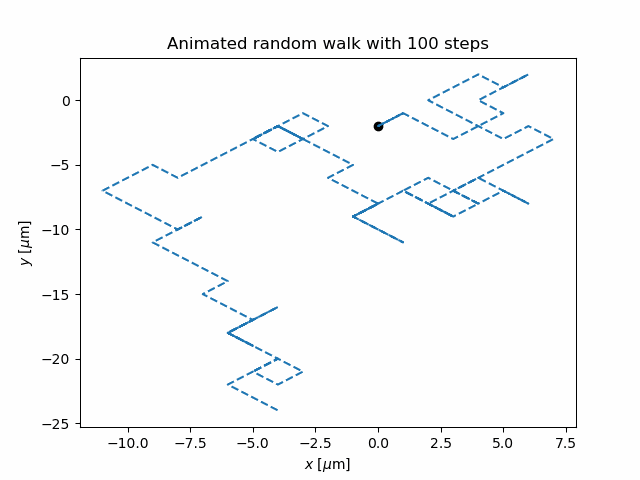

In [194]:
fig = plt.figure(1)
ax = plt.axes()

def path(k):
    point.set_offsets((x_traj[k+1], y_traj[k+1]))
    return point

plt.plot(x_traj, y_traj, linestyle = 'dashed')
point = ax.scatter(x_traj[0], y_traj[0], color = 'black')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Animated random walk with %3d steps" %(n_steps))

ani = FuncAnimation(fig, path, frames=n_steps-1, interval=1)

file_path = "randomwalk.gif"
ani.save(file_path, writer=PillowWriter(fps=10))
plt.close(fig)
Image(filename=file_path)

Text(0.5, 1.0, 'Random walk with 1000 steps')

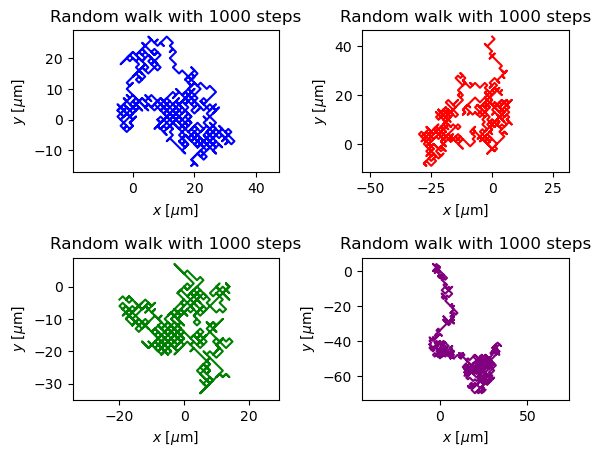

In [195]:
n_steps = 1000
p = 0.5

x_traj1 = get_trajectory(n_steps, p)
y_traj1 = get_trajectory(n_steps, p)

x_traj2 = get_trajectory(n_steps, p)
y_traj2 = get_trajectory(n_steps, p)

x_traj3 = get_trajectory(n_steps, p)
y_traj3 = get_trajectory(n_steps, p)

x_traj4 = get_trajectory(n_steps, p)
y_traj4 = get_trajectory(n_steps, p)

plt.figure(2)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(2,2,1)
plt.plot(x_traj1, y_traj1, color = 'blue')
plt.axis('equal')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Random walk with %4d steps" %(n_steps))

plt.subplot(2,2,2)
plt.plot(x_traj2, y_traj2, color = 'red')
plt.axis('equal')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Random walk with %4d steps" %(n_steps))

plt.subplot(2,2,3)
plt.plot(x_traj3, y_traj3, color = 'green')
plt.axis('equal')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Random walk with %4d steps" %(n_steps))

plt.subplot(2,2,4)
plt.plot(x_traj4, y_traj4, color = 'purple')
plt.axis('equal')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Random walk with %4d steps" %(n_steps))

Now, as each of our figures thus far have shown, each random walk is distinct and unique from the next, even though they started at the same point $\mathbf{\vec{0}}$. This graphical representation is great for small numbers of walks, but to answer meaningful probabilistic questions about such walks, we need to increase our number of walks, which hinders our graphical analytic ability. However, Python provides us with sufficient and necesssary tools for numerical analysis.

We will first consider how far each of our random walks made it from their initial position at the origin. In other words, what was the total displacement over their walk?

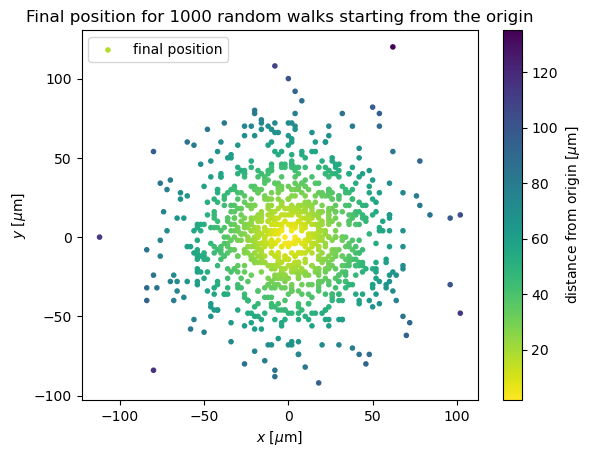

In [196]:
n_walks = 1000

traj_caller = lambda x: x*0 +get_trajectory(n_steps, p)[-1]
x_fin = np.array([traj_caller(x) for x in range(n_walks)])
y_fin = np.array([traj_caller(x) for x in range(n_walks)])
displacements = np.sqrt(x_fin**2 + y_fin**2)


plt.figure(3)
plt.scatter(x_fin, y_fin, label = r'final position', c=displacements, cmap='viridis_r', s = 9)
plt.colorbar(label = r'distance from origin [$\mu$m]')
plt.xlabel(r"$x$ [$\mu$m]")
plt.ylabel(r"$y$ [$\mu$m]")
plt.title("Final position for %4d random walks starting from the origin" %(n_walks))
plt.legend()

From this figure, it appears that "most" final positions remain "near" the origin, but just how many? How would we quantify such an observation? We can use yet another probabilistic tool called the histogram to do just that. A histogram is a type of bar graph that takes a set of observation data, groups them into bins of a particular size, and the heights *often* reflect the frequency of occurrence. This can be done many ways, but we will use functionality from the `pyplot` module.

Text(0, 0.5, 'Probability')

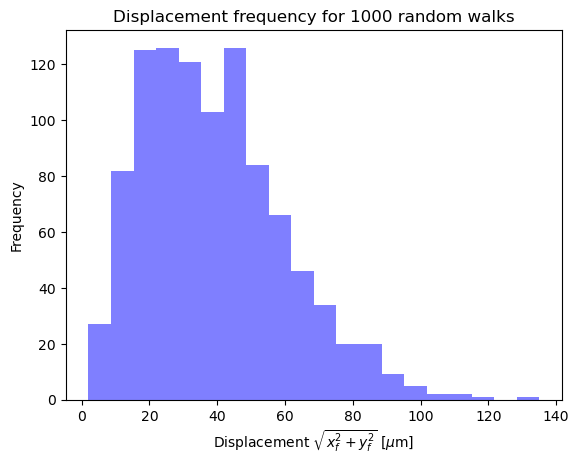

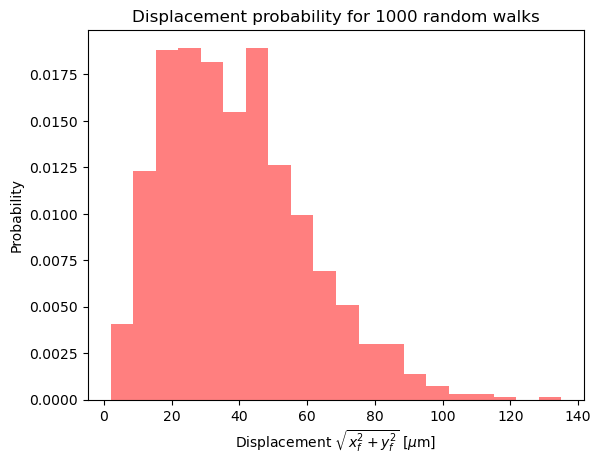

In [197]:
plt.figure(4)
plt.hist(displacements, bins = 20, color = 'blue', alpha = 0.5)
plt.title("Displacement frequency for %4d random walks" %(n_walks))
plt.xlabel(r"Displacement $\sqrt{x_{f}^2 + y_{f}^2}$ [$\mu$m]")
plt.ylabel("Frequency")

plt.figure(5)
plt.hist(displacements, bins = 20, density = True, color = 'red', alpha = 0.5)
plt.title("Displacement probability for %4d random walks" %(n_walks))
plt.xlabel(r"Displacement $\sqrt{x_{f}^2 + y_{f}^2}$ [$\mu$m]")
plt.ylabel("Probability")

We can also plot histograms (both frequency and probability) of the squared displacements `displacements**2`.

Text(0, 0.5, 'Probability')

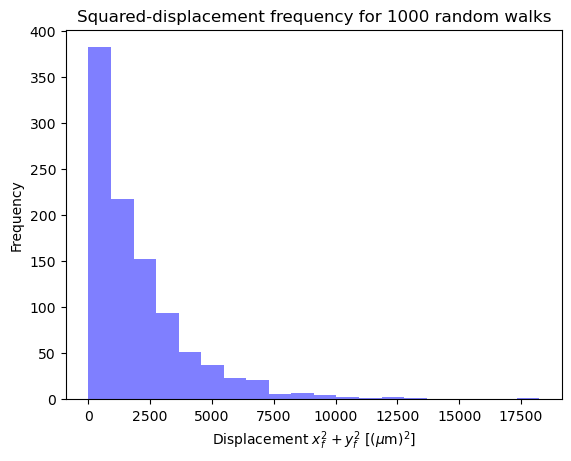

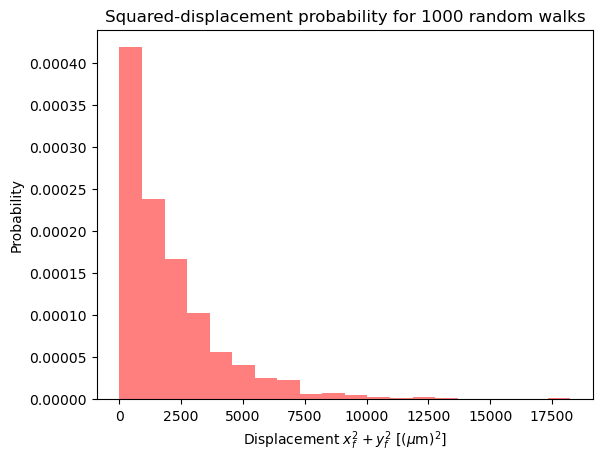

In [198]:
square_displacements = displacements**2
plt.figure(6)
plt.hist(square_displacements, bins = 20, color = 'blue', alpha = 0.5)
plt.title("Squared-displacement frequency for %4d random walks" %(n_walks))
plt.xlabel(r"Displacement ${x_{f}^2 + y_{f}^2}$ [$(\mu\text{m})^2$]")
plt.ylabel("Frequency")

plt.figure(7)
plt.hist(square_displacements, bins = 20, density = True, color = 'red', alpha = 0.5)
plt.title("Squared-displacement probability for %4d random walks" %(n_walks))
plt.xlabel(r"Displacement ${x_{f}^2 + y_{f}^2}$ [$(\mu\text{m})^2$]")
plt.ylabel("Probability")

Graphically, we can see that the squared displacements for each trial follow a roughly exponential distribution. How might we check for exponential relations? With semi-$\log$ plots. If we believe that our observations follow some exponential mapping, say $f(x)=Ab^{x}$, then the taking the logarithm of both sides, we have
\begin{align}
\log(f(x))&=\log(Ab^{x})\\
&=\log(A)+x\log(b)
\end{align}
which is an affine function. Thus, if there exists an exponential relation, a semi-$\log$ plot will reveal the graph of an affine function.

Text(0, 0.5, 'Frequency')

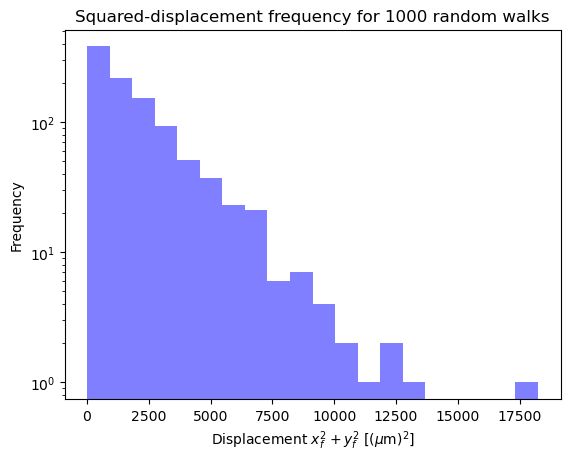

In [199]:
square_displacements = displacements**2
plt.figure(8)
plt.hist(square_displacements, bins = 20, color = 'blue', alpha = 0.5)
plt.title("Squared-displacement frequency for %4d random walks" %(n_walks))
plt.yscale('log')
plt.xlabel(r"Displacement ${x_{f}^2 + y_{f}^2}$ [$(\mu\text{m})^2$]")
plt.ylabel("Frequency")


From these figures, we can see that there does exist an exponential relation, or we could say that the squared displacements are *exponentially distributed*.

Another quantity to look at is our *mean-square-displacement* which is the mean (or average) value of each element in our squared displacements array. We may wonder how the mean-square displacement varies as we increase the number of steps in the walk. To do so, we will create 1000 random walks of length $10^{k}$, where $k=1,2,3,4,5,6,7$. Since we'll be dealing with exponentially increasing powers of $10$ we will do a $\log$-$\log$ plot of our mean-square displacements by the length of the random walk.

Text(0, 0.5, 'Mean-square displacement')

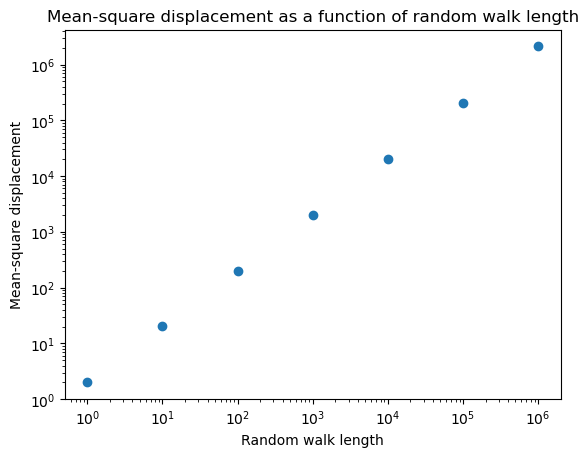

In [200]:
num_steps = [10**k for k in range(0,7)]
mean_disps = np.zeros(7)
i = 0
for n in num_steps:
    traj_caller = lambda x: x*0 +get_trajectory(n, p)[-1]
    x_fin = np.array([traj_caller(x) for x in range(n_walks)])
    y_fin = np.array([traj_caller(x) for x in range(n_walks)])
    square_displacements = (x_fin**2 + y_fin**2)
    mean_disps[i]=np.mean(square_displacements)
    i+=1
plt.figure(10)
plt.loglog(num_steps, mean_disps, linestyle = ' ', marker = 'o')
plt.title("Mean-square displacement as a function of random walk length")
plt.xlabel(r"Random walk length")
plt.ylabel(r"Mean-square displacement")

From our figure, the $\log$-$\log$ plot reveals a *power-law* relationship between mean-square-displacement and random walk length since it appears to be the graph of an affine function.
That is to say that mean-square-displacement is a power-law function of random walk length.

In all of our simulated randomness, we have found some predictable truths about random walks. Firstly, the squared-displacement, i.e. the square of the distance from starting position to terminal position is exponentially distributed. Thus, from this decaying exponential behavior, we can see that "long" distances, say $120\mu\text{m}$, are far less likely than shorter walks, say $30\mu\text{m}$. Secondly, we found that the mean-square displacement of a random walk, when plotted against the length of the walk, is a power-law relation. 

## Rare Events
The Bernoulli trial basis of a random walk allows us great flexibility in modelling because we can readily change the probability of success. Consider for instance a Bernoulli trial where the probability of success $p=0.08$. Rare events such as $x$ successes occuring in $100$ trials can be modelled via the Poisson distribution, since it can be thought of as a Poisson process. Mathematically, a Poisson process is a situation in which a discrete number of occurrences are equally likely within some continuous interval. Such occurrences have a rate $\lambda$ over their interval. The events within the process are separated such that for sufficiently short subintervals, the probability of more than one occurrence in the subinterval is negligible. If our discrete random variable $X$ is the number of events in our interval, then $X$ follows a Poisson distribution. The probability mass function for $X$ is given by
\begin{align}
\mathfrak{P}(x;\lambda)&=\frac{\mu^{x}}{x!}e^{-\mu},
\end{align}
where $\mu=\lambda \cdot l$ is the expected value of $X$ and $l$ is the length of the interval.

For our example, the Bernoulli trial with $p=0.08$ and an interval $100$ trials, is modelled by
\begin{align}
\mathfrak{P}(x;\lambda=0.08)&=\frac{8^{x}}{x!}e^{-8}
\end{align}
We plot $\mathfrak{P}$ below for $x\in[0,10]$. 

Text(0, 0.5, 'probability $\\mathfrak{P}(x)$')

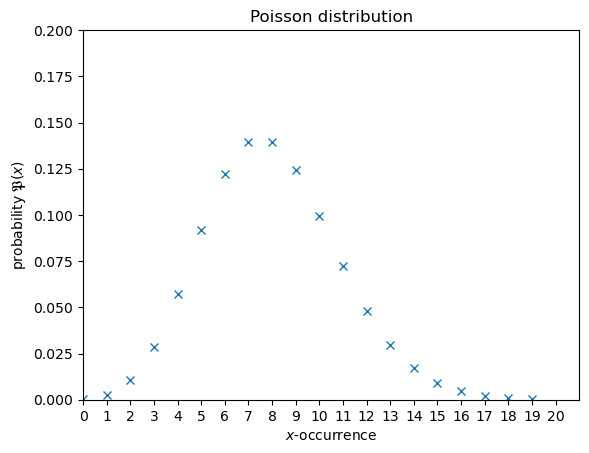

In [201]:
def poisson(x, lamb, l):
    return (lamb*l)**x*np.exp(-lamb*l)/factorial(x)

x = np.arange(0,20)
plt.figure(11)
plt.title("Poisson distribution")
plt.plot(x, poisson(x, 0.08, 100), linestyle = '', marker = 'x')
plt.xticks(np.arange(0,21,1))
plt.axis([0,21, 0, 0.2])
plt.xlabel(r"$x$-occurrence")
plt.ylabel(r"probability $\mathfrak{P}(x)$")

We will now simulate $N=1000$ trials each consisting of $100$ flips of a coin with $p=0.08$ probability of landing heads. We will count the number of heads that occur and plot them as a histogram (both frequency and probability). We plot our Poisson probability mass function on top of our probability histogram.

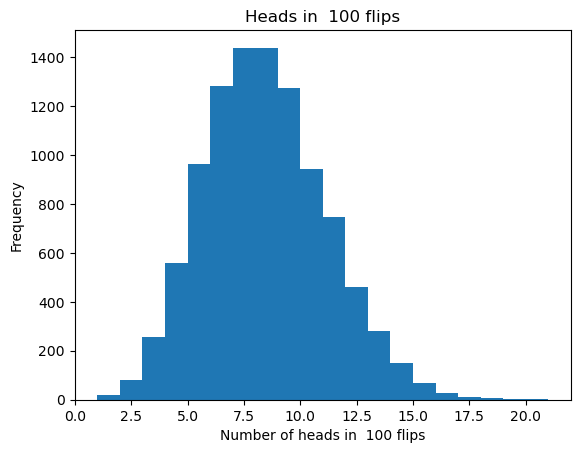

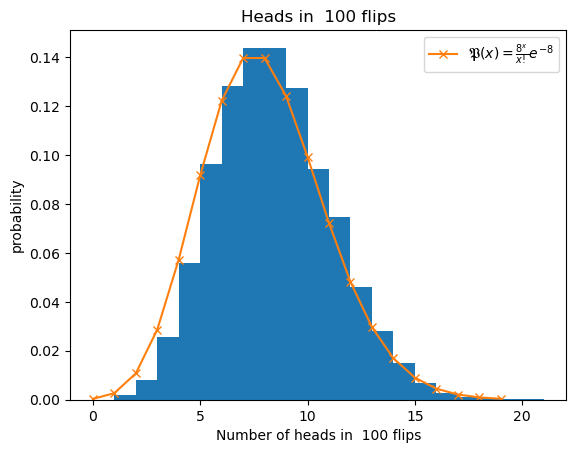

In [202]:
def coin_flip(flips, p):
    samp = rand(flips)
    disp = (samp<p)
    return disp
    
n_trials = 10000
n_flips = 100
p = 0.08

heads = np.zeros(n_trials)
for i in range(n_trials):
    heads[i] = np.count_nonzero(coin_flip(n_flips,p))

plt.figure(12)
plt.hist(heads, bins = 20)
plt.xlabel("Number of heads in %4d flips" %(n_flips))
plt.ylabel("Frequency")
plt.title("Heads in %4d flips" %(n_flips))

plt.figure(13)
plt.hist(heads, bins = 20, density = True)
plt.plot(x, poisson(x, 0.08, 100), linestyle = '-', marker = 'x', label = r"$\mathfrak{P}(x)=\frac{8^{x}}{x!}e^{-8}$")
plt.xlabel("Number of heads in %4d flips" %(n_flips))
plt.ylabel("probability")
plt.title("Heads in %4d flips" %(n_flips))
plt.legend()

For sufficiently large values of `n_trials`, we should expect the Poisson distribution to exactly model our data.

Now, with such a rare probability of success, we may ask how long do we go without a success? Or, how are the waiting times between successes distributed? We can answer this by simulating a set of coin flips, then using `np.nonzero`, we count the number of zero elements are between each nonzero element. Then, the waiting time will simply be the number of zero elements plus one. We can then take the difference between successive elements to determine the waiting time between successes. We plot this as a frequency histogram.

(array([2.311e+03, 1.272e+03, 9.050e+02, 7.980e+02, 6.110e+02, 4.890e+02,
        3.720e+02, 3.770e+02, 2.060e+02, 1.390e+02, 1.280e+02, 9.800e+01,
        7.600e+01, 6.600e+01, 4.200e+01, 3.300e+01, 2.500e+01, 1.600e+01,
        1.400e+01, 1.200e+01, 1.000e+01, 6.000e+00, 8.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([ 1.        ,  4.13333333,  7.26666667, 10.4       , 13.53333333,
        16.66666667, 19.8       , 22.93333333, 26.06666667, 29.2       ,
        32.33333333, 35.46666667, 38.6       , 41.73333333, 44.86666667,
        48.        , 51.13333333, 54.26666667, 57.4       , 60.53333333,
        63.66666667, 66.8       , 69.93333333, 73.06666667, 76.2       ,
        79.33333333, 82.46666667, 85.6       , 88.73333333, 91.86666667,
        95.        ]),
 <BarContainer object of 30 artists>)

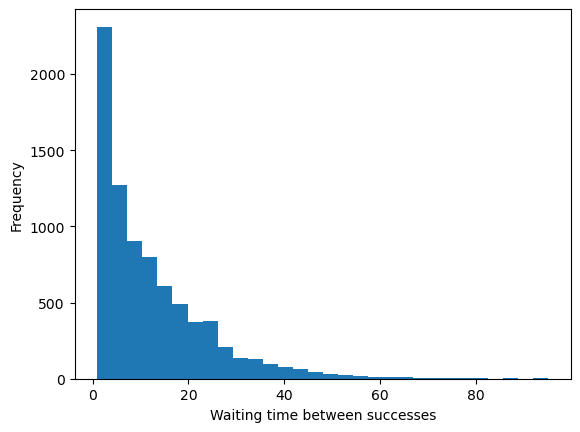

In [203]:
n_flips = 100000
flips = coin_flip(n_flips,p)
waiting_times = np.nonzero(flips)
wait = np.diff(waiting_times).flatten()
plt.figure(14)
plt.ylabel("Frequency")
plt.xlabel("Waiting time between successes")
plt.hist(wait, bins = 30)


As the geometry of this histogram sticks out as looking slightly exponential, we will do a semi-$\log$ plot to determine the actual behavior we are observing.

(array([2.311e+03, 1.272e+03, 9.050e+02, 7.980e+02, 6.110e+02, 4.890e+02,
        3.720e+02, 3.770e+02, 2.060e+02, 1.390e+02, 1.280e+02, 9.800e+01,
        7.600e+01, 6.600e+01, 4.200e+01, 3.300e+01, 2.500e+01, 1.600e+01,
        1.400e+01, 1.200e+01, 1.000e+01, 6.000e+00, 8.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([ 1.        ,  4.13333333,  7.26666667, 10.4       , 13.53333333,
        16.66666667, 19.8       , 22.93333333, 26.06666667, 29.2       ,
        32.33333333, 35.46666667, 38.6       , 41.73333333, 44.86666667,
        48.        , 51.13333333, 54.26666667, 57.4       , 60.53333333,
        63.66666667, 66.8       , 69.93333333, 73.06666667, 76.2       ,
        79.33333333, 82.46666667, 85.6       , 88.73333333, 91.86666667,
        95.        ]),
 <BarContainer object of 30 artists>)

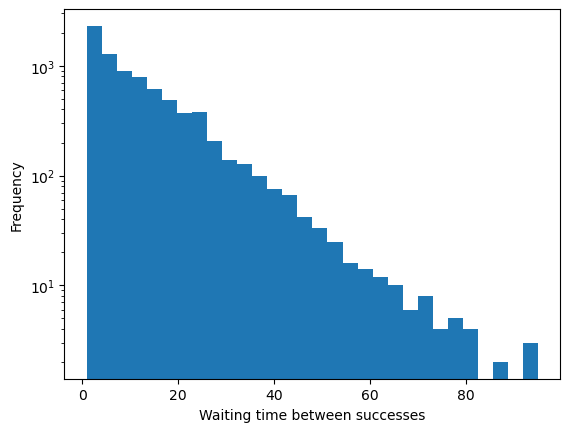

In [204]:
plt.figure(15)
plt.subplot(1,1,1)
plt.ylabel("Frequency")
plt.xlabel("Waiting time between successes")
plt.yscale("log")
plt.hist(wait, bins = 30)

As this we can see, the graph appears to be that of an affine function. Thus, we conclude that the waiting time between successes is distributed exponentially.

## Using real Data
We will now apply some of our newfound knowledge of random walks to a dataset of a particle exhibiting Brownian motion. We import the data set below. We also plot the complete trajectory of the particle, labeling the initial point $(x_0, y_0)$ and terminal point $(x_{f},y_{f})$ of its walk.

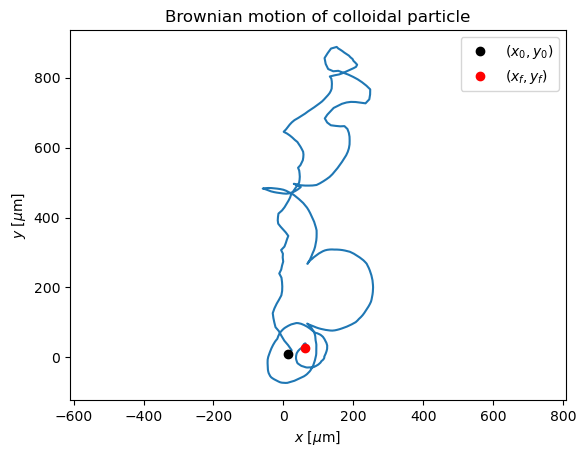

In [205]:
# loading data set into numpy array
file_name = r"C:\Users\rpwar\pmls-data\04-Brownian\g26perrindata.csv"
data_set = np.loadtxt(file_name, delimiter=',')

# pulling dx and dy columns from data set into individual arrays
dx = data_set[:,0]
dy = data_set[:,1]

dx_traj = np.cumsum(dx)
dy_traj = np.cumsum(dy)
plt.figure(16)
plt.title("Brownian motion of colloidal particle")
plt.plot(dx_traj,dy_traj)
plt.xlabel(r"$x$ $[\mu\text{m}]$")
plt.ylabel(r"$y$ $[\mu\text{m}]$")
plt.plot(dx_traj[0],dy_traj[0], linestyle = ' ', marker = 'o', color = 'black', label = r'$(x_{0},y_{0})$')
plt.plot(dx_traj[-1],dy_traj[-1], linestyle = ' ', marker = 'o', color = 'red', label = r'$(x_{f},y_{f})$')
plt.axis('equal')
plt.legend()

As we did in our simulation section, we will investigate the distribution of the squared displacement. Below we calculate the squared displacement for this random walk and plot a frequency histogram of the results.

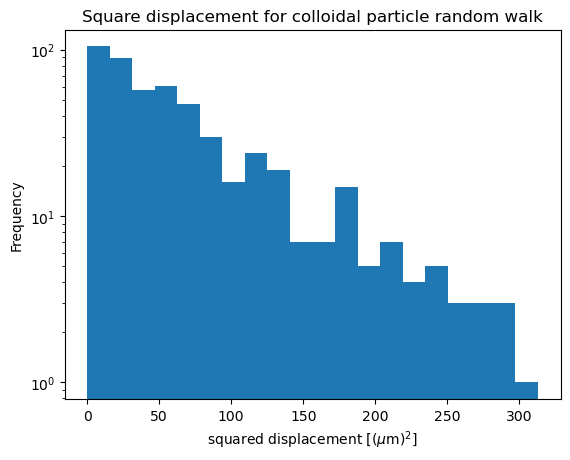

In [206]:
squared_displacements = dx[:]**2 + dy[:]**2
plt.figure(17)
plt.title("Square displacement for colloidal particle random walk")
plt.hist(squared_displacements, bins = 20)
plt.xlabel(r"squared displacement $[(\mu\text{m})^2]$")
plt.ylabel(r"Frequency")
plt.yscale("log")

Our data appear to be distributed exponentially, which is what we saw with our simulation.

Now, what separates this data from our simulation, aside from it not being simulated, is that the displacement between each step varied between steps. That is, the colloidal particle had different step lengths. We can simulate this by creating an array of total displacements of $1000$ walks, each with $500$ steps. That is, we will simulate $1000$ walks, and of each of these, we will sum the displacement over the entire walk, and each total will represent just one step of our walk.

We simulate this below and plot a histogram of the squared displacement, as well as the actual simulated trajectory.

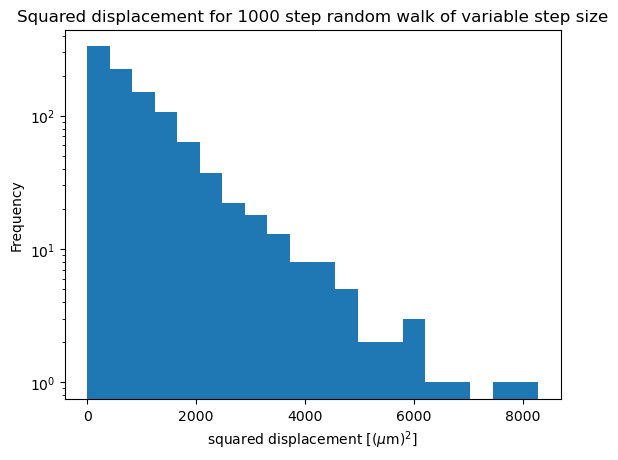

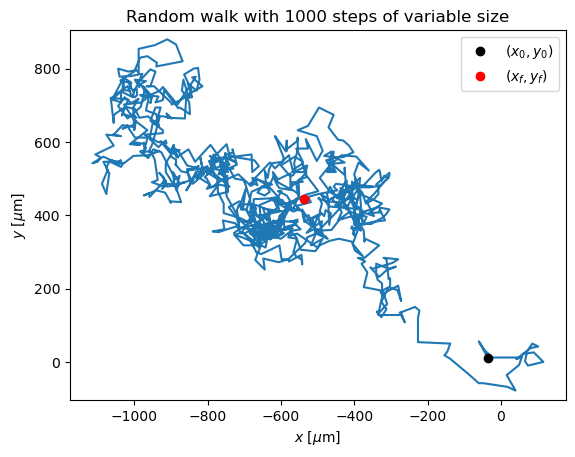

In [213]:
# steps and coin flip probability
n_steps = 500
n_walks = 1000
p = 0.5

# function to generate random displacement array of length N for probability p
def get_displacement(N, p):
    samp = rand(N)
    disp = 2*(samp < p) -1
    return disp

# assign dx and dy displacements
# note here that our displacements are also in micrometers
sim = np.zeros((n_walks,2))
for i in range(n_walks):
    dx_sim = get_displacement(n_steps, 0.5)
    dy_sim = get_displacement(n_steps, 0.5)
    x = np.sum(dx_sim)
    y = np.sum(dy_sim)
    sim[i,:] = x, y



x_traj = np.cumsum(sim[:,0])
y_traj = np.cumsum(sim[:,1])

# squared displacements
square_disp_sim = sim[:,0]**2 + sim[:,1]**2
plt.figure(18)
plt.title("Squared displacement for %4d step random walk of variable step size" %(n_walks))
plt.hist(square_disp_sim,20)
plt.xlabel(r"squared displacement $[(\mu\text{m})^2]$")
plt.ylabel(r"Frequency")
plt.yscale("log")


plt.figure(19)
plt.title("Random walk with %4d steps of variable size" %(n_walks))
plt.xlabel(r"$x$ $[\mu\text{m}]$")
plt.ylabel(r"$y$ $[\mu\text{m}]$")
plt.plot(x_traj, y_traj)
plt.plot(x_traj[0],y_traj[0], linestyle = ' ', marker = 'o', color = 'black', label = r'$(x_{0},y_{0})$')
plt.plot(x_traj[-1],y_traj[-1], linestyle = ' ', marker = 'o', color = 'red', label = r'$(x_{f},y_{f})$')
plt.axis('equal')
plt.legend()

Our data qualitatively resembles the experimental data quite well. From the semi-$\log$ scale, it appears also to be distributed exponentially. The exponential distribution is a continuous distribution, so for small numbers of steps, it may not fit our squared displacements well, but as the number of steps increases, the exponential distribution will be an even better fit.